# Dataset Description
### Overview
The data has been split into two groups:
* training set (train.csv)
* test set (test.csv)

**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use *feature engineering* to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include **gender_submission.csv**, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Data Dictionary

| Variable |                 Definition                 |                       Key                      |
|:---------|:-------------------------------------------|:-----------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable Notes
**pclass**: A proxy for socio-economic status (SES) <br>
1st = Upper <br>
2nd = Middle <br>
3rd = Lower <br>

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

source:
https://www.kaggle.com/competitions/titanic

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['age', 'fare']
categorical_features = ['pclass', 'sex', 'sibsp', 'parch', 'embarked']
removeable_features = ['passengerid', 'name', 'ticket', 'cabin']

In [122]:
train = pd.read_csv('train.csv').copy()
test = pd.read_csv('test.csv').copy()

In [123]:
# Rename columns name into lowercase
train.columns = [x.lower() for x in train.columns]

In [6]:
train.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


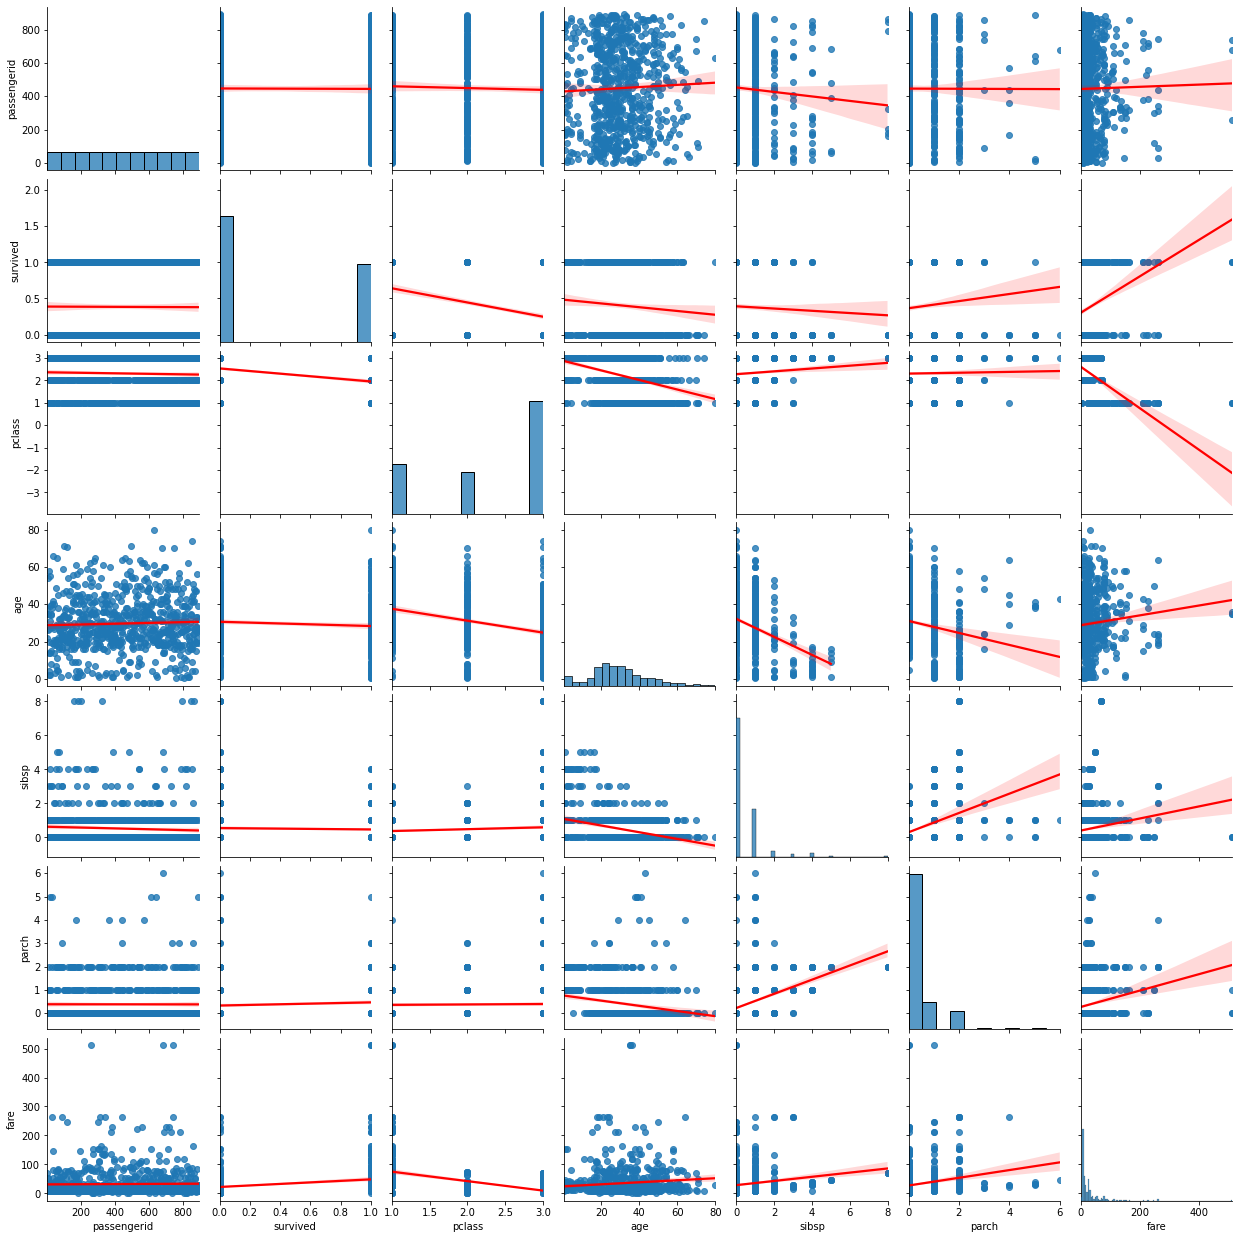

In [34]:
sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'red'}})

In [36]:
train.describe(include='all')

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
train

In [129]:
# Filter out outliers
def filter_outlier(df):
    # Select the columns to filter out outliers
    cols_to_filter = numerical_features

    # Calculate the quartiles and interquartile range
    Q1 = df[cols_to_filter].quantile(0.25)
    Q3 = df[cols_to_filter].quantile(0.75)
    IQR = Q3 - Q1

    # Set the lower and upper thresholds
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Filter the df
    df = df[~((df[cols_to_filter] < lower_threshold) | (df[cols_to_filter] > upper_threshold)).any(axis=1)]
    return df

In [38]:
train.shape

(891, 12)

In [132]:
df = train.copy()
print(df.shape)
df = filter_outlier(df)
print(df.shape)

(891, 12)
(765, 12)


In [73]:
# Filter out outliers
def single_filter_outlier(df,cols_to_filter):


    # Calculate the quartiles and interquartile range
    Q1 = df[cols_to_filter].quantile(0.25)
    Q3 = df[cols_to_filter].quantile(0.75)
    IQR = Q3 - Q1

    # Set the lower and upper thresholds
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Filter the df
    df = df[~((df[cols_to_filter] < lower_threshold) | (df[cols_to_filter] > upper_threshold))]
    return df

In [77]:
df = train.copy()
print(df.shape)
df = single_filter_outlier(df,'fare')
print(df.shape)
df = single_filter_outlier(df,'age')
print(df.shape)

(891, 12)
(775, 12)
(763, 12)


In [40]:
df.shape

(891, 12)

In [114]:
df = train.copy()
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)
print(Q1,Q3,IQR)
print(Q1-1.5*IQR, Q3+1.5*IQR)

20.125 38.0 23.0896
-14.5094 72.6344


In [113]:
df = train.copy()
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3-Q1
print(Q1,Q3,IQR)
print(Q1-1.5*IQR, Q3+1.5*IQR)

7.9104 31.0 23.0896
-26.724 65.6344


In [115]:
train.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [106]:
df = train.copy()

# Select the columns to filter out outliers
cols_to_filter = numerical_features

# Calculate the quartiles and interquartile range
Q1 = df[cols_to_filter].quantile(0.25)
Q3 = df[cols_to_filter].quantile(0.75)
IQR = Q3 - Q1

# Set the lower and upper thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Filter the df
df = df[~((df[cols_to_filter] < lower_threshold) | (df[cols_to_filter] > upper_threshold)).any(axis=1)]
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,765.000000,765.000000,765.000000,603.000000,765.000000,765.000000,765.000000
mean,446.809150,0.342484,2.488889,28.269900,0.443137,0.343791,17.732232
std,259.721544,0.474851,0.728223,13.468892,0.904307,0.789810,13.479643
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,215.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,450.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,671.000000,1.000000,3.000000,36.000000,1.000000,0.000000,26.000000
max,891.000000,1.000000,3.000000,64.000000,5.000000,6.000000,65.000000


In [126]:
df = train.copy()
print(df.shape)
df = single_filter_outlier(df,'age')
print(df.shape)
df = single_filter_outlier(df,'fare')
print(df.shape)
df.describe()

(891, 12)
(880, 12)
(765, 12)


,passengerid,survived,pclass,age,sibsp,parch,fare
count,765.000000,765.000000,765.000000,603.000000,765.000000,765.000000,765.000000
mean,446.809150,0.342484,2.488889,28.269900,0.443137,0.343791,17.732232
std,259.721544,0.474851,0.728223,13.468892,0.904307,0.789810,13.479643
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,215.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,450.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,671.000000,1.000000,3.000000,36.000000,1.000000,0.000000,26.000000
max,891.000000,1.000000,3.000000,64.000000,5.000000,6.000000,65.000000


,passengerid,survived,pclass,age,sibsp,parch,fare
count,765.000000,765.000000,765.000000,603.000000,765.000000,765.000000,765.000000
mean,446.809150,0.342484,2.488889,28.269900,0.443137,0.343791,17.732232
std,259.721544,0.474851,0.728223,13.468892,0.904307,0.789810,13.479643
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,215.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,450.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,671.000000,1.000000,3.000000,36.000000,1.000000,0.000000,26.000000
max,891.000000,1.000000,3.000000,64.000000,5.000000,6.000000,65.000000


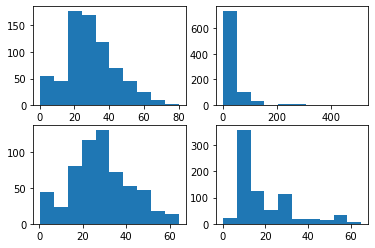

In [133]:
fig, axes = plt.subplots(nrows=2, ncols=2)

df = train.copy()

axes[0,0].hist(df.age)
axes[0,1].hist(df.fare)

df = filter_outlier(df)

axes[1,0].hist(df.age)
axes[1,1].hist(df.fare)

df.shape
df.describe()

(763, 12)

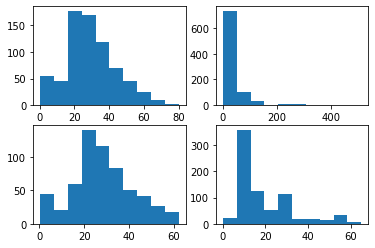

In [125]:
fig, axes = plt.subplots(nrows=2, ncols=2)

df = train.copy()

axes[0,0].hist(df.age)
axes[0,1].hist(df.fare)

df = single_filter_outlier(df,'fare')
df = single_filter_outlier(df,'age')

axes[1,0].hist(df.age)
axes[1,1].hist(df.fare)

df.shape